In [1]:
#Import all the libraries　ライブラリを読み込む:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

There are 6 datasets　ECサイトの４種類６個のデータあります。

1. customer_master.csv: customer information inc. name, gender, etc.　顧客データ：名前、性別等。
2. item_master.csv: products information inc. name, price, etc. 商品データ：商品名、価格等。
3. transaction_1.csv: transaction details. 購入明細データ。
4. transaction_1.csv: continuing transaction details of (3)'s data.　(3)の続きデータ。
5. transaction_detail_1.csv: transaction's order details.　購入明細の詳細データ。
6. transaction_detail_2.csv: continuing transaction's order details of (5)'s data.　(5)の続きデータ。

In [2]:
# Import all the above datasets　データを読み込む：
customer_master = pd.read_csv('../customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [3]:
item_master = pd.read_csv('../item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [4]:
transaction_1 = pd.read_csv('../transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [5]:
transaction_2 = pd.read_csv('../transaction_2.csv')
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [6]:
transaction_detail_1 = pd.read_csv('../transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [7]:
transaction_detail_2 = pd.read_csv('../transaction_detail_2.csv')
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [9]:
# Concatenate the datasets データを結合する
# Concatenate the datasets of transaction_1 and transaction_2:
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [10]:
# Test if the 2 dataframes were successfully concatenated　結合が完了したか確認作業:
len(transaction_1) + len(transaction_2) == len(transaction)

True

In [11]:
# Concatenate the datasets データを結合する
# Concatenate the datasets of transaction_detail_1 and transaction_detail_2:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [12]:
# Test if the 2 dataframes were successfully concatenated　結合が完了したか確認作業:
len(transaction_detail_1) + len(transaction_detail_2) == len(transaction_detail)

True

In [13]:
# Join the data to find out the revenue 売上データ同士を結合・ジョインする:
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']],
                    on='transaction_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [14]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


In [15]:
# Join the data to find out the revenue 売上データ同士を結合・ジョインする:
join_data = pd.merge(join_data, item_master, on='item_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000


In [16]:
# Join the data to find out the revenue 売上データ同士を結合・ジョインする:
join_data = pd.merge(join_data, customer_master, on='customer_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県


In [17]:
join_data.shape

(7144, 16)

In [18]:
# Check out if there is any missing value in the dataset
# 欠損値があるかどうか確認作業
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
item_name             0
item_price            0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
dtype: int64

In [19]:
# Make the total_price column by multiplying quantity with item_price
# 売上列を作る為にquantity列とprice列の掛け算で計算する
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [21]:
# Confirm if the sales figure matches 売上額が一致しているかどうか確認：
print(transaction.price.sum())
print(join_data.price.sum())

971135000
971135000


In [23]:
# Grasp the details of the data we are working with:
# 各種統計量を把握する
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
item_name             object
item_price             int64
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
price                  int64
dtype: object

In [24]:
join_data.describe()

,detail_id,quantity,item_price,age,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,50.265677,135937.150056
std,2062.439494,0.513647,64571.311830,17.190314,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,36.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,50.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,65.000000,210000.000000
max,7143.000000,4.000000,210000.000000,80.000000,420000.000000


In [25]:
print(join_data['payment_date'].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


<p>The <code>payment_date</code> column is object type, therefore we need to convert it to datetime type.
<br>The average <code>price</code> per purchase is 135,937 yen while the maximum purchase value is 420,000 yen.
<br>The average <code>age</code> of the customers is 50.26 years old and the age range is from 20 - 80 years old.
<br>There are orders with 4 items however 75% of the number of items in each order is 1.
<br>The period of purchase is from 2019-02-01 01:36:57 to 2019-07-31 23:41:38 </p>
<p><code>payment_date</code>はobject型となっているのでdatetime型に変更し、年月列の作成必要あります。
<br><code>price</code>の平均は135,937円となっていますが最高金額は420000となっています。
<br><code>age</code>をみると、顧客の平均年齢は50.26です20歳から80歳までの範囲の顧客像が見えてきます。
<br><code>quantity</code>をみると最大は4ですが75％数でも1なので、ほとんどの顧客が数量1で購入していることがわかります。
<br>注文は2019-02-01 01:36:57から2019-07-31 23:41:38までのデータ範囲であることがわかります。</p>

In [26]:
# Convert data type for the payment_date column
# データ型の変更作業
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])

In [27]:
# Confirm if the data was converted successfully
# データ型の変更済かどうか確認
join_data['payment_date'].head()

0   2019-02-01 01:36:57
1   2019-02-01 01:37:23
2   2019-02-01 02:34:19
3   2019-02-01 02:47:23
4   2019-02-01 04:33:46
Name: payment_date, dtype: datetime64[ns]

In [28]:
# Add the monthly column for the dataset:
# 月別列の作成
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')
join_data[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


# Groupby

In [29]:
# Use groupby to get the total sales for each month
# groupbyによる月別の売上額を集計する
join_data.groupby('payment_month').sum()['price']

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [30]:
# Use groupby to get the total sales for each month and for each item:
# groupbyによる月別・商品別の売上額を集計する
join_data.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

# Pivot-Table

In [31]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'],
              aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

In [32]:
table1 = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price',
                       aggfunc='sum')
table1.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


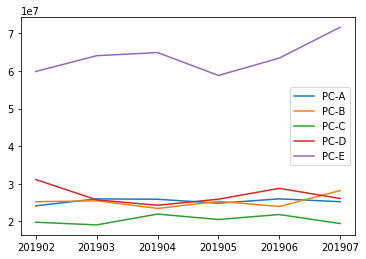

In [33]:
plt.plot(list(table1.index), table1['PC-A'], label='PC-A')
plt.plot(list(table1.index), table1['PC-B'], label='PC-B')
plt.plot(list(table1.index), table1['PC-C'], label='PC-C')
plt.plot(list(table1.index), table1['PC-D'], label='PC-D')
plt.plot(list(table1.index), table1['PC-E'], label='PC-E')
plt.legend()

In [34]:
table2 = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='quantity',
                        aggfunc='sum')
table2

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,483,297,165,173,285
201903,520,300,159,143,305
201904,518,276,183,135,309
201905,497,298,171,144,280
201906,520,282,182,160,302
201907,505,332,162,145,341


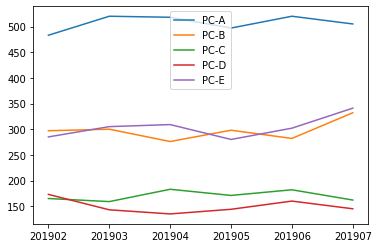

In [35]:
plt.plot(list(table2.index), table2['PC-A'], label='PC-A')
plt.plot(list(table2.index), table2['PC-B'], label='PC-B')
plt.plot(list(table2.index), table2['PC-C'], label='PC-C')
plt.plot(list(table2.index), table2['PC-D'], label='PC-D')
plt.plot(list(table2.index), table2['PC-E'], label='PC-E')
plt.legend()

# Conclusion 結論

PC-A sales quantity has always been highest, then PC-B & PC-E.
<br>PC-E has the highest price and also the highest sales revenue.
<br>PC-Aの売上数は最多で、次はPC-B & PC-E。
<br>PC-Eの売上額は最多で、お値段も一番高いものになります。